In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

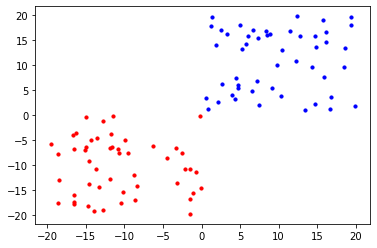

In [65]:
# Generate 2 groups of random 2d data
bgroup = 20 * np.random.rand(100, 2)
rgroup = -20 * np.random.rand(50, 2)
# Replace the second half of bgroup with rgroup
bgroup[50:100, :] = rgroup
plt.scatter(bgroup[0:50, 0], bgroup[0:50, 1], s = 10, c = 'b')
plt.scatter(bgroup[50:100, 0], bgroup[50:100, 1], s = 10, c = 'r')
plt.show()

In [66]:
Kmean = KMeans(n_clusters = 2)
Kmean.fit(bgroup)
Kmean.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


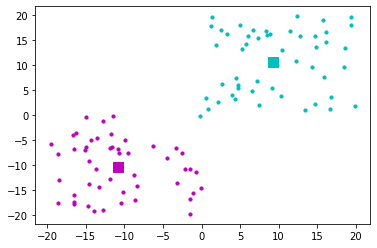

In [67]:
print(Kmean.labels_)
labels = Kmean.labels_
centroids = Kmean.cluster_centers_

for i in range(100):
    if labels[i] == 1:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'c')
    else:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'm')

plt.scatter(centroids[0][0], centroids[0][1], s = 100, c = 'm', marker='s')
plt.scatter(centroids[1][0], centroids[1][1], s = 100, c = 'c', marker='s')
plt.show()

In [68]:
# Our KMeans class
class KMemes:
    # Constructor
    def __init__(self, n_clusters, n_init):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.labels_ = []
        self.centroids = []
        self.fitted = False

    # array has 2 axes- (number of points, dimensions per point)
    def fit(self, array):

        if len(np.shape(array)) != 2:
            print("Error: bad array shape")
            return
        
        # Get number of dimensions for each point
        self.point_dimensions = np.shape(array)[1]
        # labels has an int representing an index in centroids for each point
        self.labels_ = np.zeros(shape=(np.shape(array)[0]), dtype = int)
        # Used to compare different runs against each other
        self.best_distance = sys.maxsize # infinity

        for i in range(self.n_init):
            # Used to measure how many iterations were run
            self.iterations = 0
            # Randomly select centroids (don't directly change self.centroids yet)
            new_centroids = np.random.rand(self.n_clusters, self.point_dimensions)
            # used to check if centroids are changing
            prev_centroids = new_centroids

            while True:
                self.iterations += 1
                total_distance = 0
                # Get the closest centroid for each data point
                for point in range(len(array)):
                    # Shortest distance from a centroid to the point
                    shortest_distance = sys.maxsize
                    for centroid in range(self.n_clusters):
                        current_distance = 0
                        # Calculate squared distance from centroid to point (computation efficiency)
                        for dimension in range(self.point_dimensions):
                            current_distance += (new_centroids[centroid][dimension] - array[point][dimension])**2
                        if current_distance < shortest_distance:
                            shortest_distance = current_distance
                            # Label each point with its closest centroid
                            self.labels_[point] = centroid
                    total_distance += shortest_distance
                # Update centroids with means of each cluster:
                # Sum of coordinates of all points in each cluster
                cluster_coordinate_sums = np.zeros((self.n_clusters, self.point_dimensions), dtype=float)
                # Number of points in each cluster
                cluster_numberof_points = np.zeros(self.n_clusters)
                # Check which centroid for every point
                for point in range(len(array)):
                    # labels_[point] is the centroid index of the data point with index 'point'
                    cluster_coordinate_sums[self.labels_[point]] += array[point]
                    cluster_numberof_points[self.labels_[point]] += 1
                new_centroids = cluster_coordinate_sums / cluster_numberof_points
                # Stop iterating once the centroids have stopped changing
                # Checks if all the elements of new_centroids and prev_centroids are equal
                if (new_centroids == prev_centroids).all():
                    self.fitted = True
                    if total_distance < self.best_distance:
                        best_distance = total_distance
                        # Update the actual centroids
                        self.centroids = new_centroids
                    break
                prev_centroids = new_centroids

    def debugprint(self):
        if self.fitted == False:
            print("Not fitted")
            return
        print("centroids: " + str(self.centroids))
        print("labels: " + str(self.labels_))   
        print("iterations: " + str(self.iterations))
    # input a point with dimension (point_dimensions), outputs the label
    # def predict(point):
        


centroids: [[-10.63740511 -10.24444693]
 [  9.49894272  10.83258096]]
labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
iterations: 3


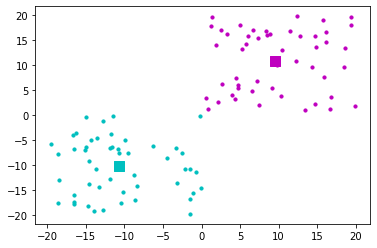

In [69]:
myKmeans = KMemes(n_clusters = 2, n_init = 30)
myKmeans.fit(bgroup)
myKmeans.debugprint()

myLabels = myKmeans.labels_
myCentroids = myKmeans.centroids

for i in range(100):
    if myLabels[i] == 1:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'm')
    else:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'c')

plt.scatter(myCentroids[0][0], myCentroids[0][1], s = 100, c = 'c', marker='s')
plt.scatter(myCentroids[1][0], myCentroids[1][1], s = 100, c = 'm', marker='s')
plt.show()

In [51]:
test = np.array([[2, 4, 6], [4, 6, 8], [6, 8, 10]], dtype=float)
test /= [2, 2, 2]
test

array([[1., 2., 3.],
       [2., 3., 4.],
       [3., 4., 5.]])